<font size="6">MEC301 - Métodos Numéricos</font>
# Diferencias finitas para ecuaciones diferenciales parciales
<br><br><br><br>
Profesor: Francisco Ramírez Cuevas<br>
Fecha: 14 de noviembre 2022

## Introducción


Como mencionamos en la [unidad 9](https://panxopanza.github.io/metodos_numericos_mec301/9-EDO_valor_inicial/9-EDO_valor_inicial.html), una **ecuación en derivadas parciales (EDP)** corresponde a una **ecuación diferencial para una función desconocida con derivadas respecto a dos o más variables dependientes**.

Por ejemplo, 

\begin{equation}
\frac{\partial^2u}{\partial x^2} + 
2xy\frac{\partial^2u}{\partial y^2} = 0
\end{equation}

\begin{equation}
\frac{\partial^3u}{\partial x^2\partial y} + 
x\frac{\partial^2u}{\partial y^2}  + 8u= 0
\end{equation}




\begin{equation}
\left(\frac{\partial^2u}{\partial x^2}\right)^3 + 
6\frac{\partial^3u}{\partial x\partial y^2} = x
\end{equation}


\begin{equation}
\left(\frac{\partial^2u}{\partial x^2}\right)^3 + 
xu\frac{\partial u}{\partial y} = x
\end{equation}

El ***orden*** de una EDP se define **respecto a la derivada parcial de mayor orden**. Así, la ecuación (11.1) y (11.4) son de segundo orden, mientras que (11.2) y (11.3) son de tercer orden.

Se dice que una EDP es ***lineal* si, dada dos soluciones $u_1$ y $u_2$, la función $u_1 + u_2$ también es solución**. Por ejemplo, (11.1) y (11.2) son lineales, mientras que (11.3) y (11.4) no lo son.

En este curso nos enfocaremos en EDP lineales de segundo orden de la forma:

\begin{equation}
A\frac{\partial^2u}{\partial x^2} + 
B\frac{\partial^2u}{\partial x \partial y} +  
C\frac{\partial^2u}{\partial y^2} + 
D = 0
\end{equation}

donde $A$, $B$, $C$ son funciones de $x$ e $y$, mientras que $D$ es una función de $x$, $y$, $\partial u / \partial x$ y $\partial u / \partial y$. 

A partir de esta forma general podemos clasificar una EDP lineal de segundo orden como elíptica, parabólica o hiperbólica.

<img src="./images/EDP_2do-orden.png" width="700px" align= center>

Esta clasificación es relevante dado que cada categoría se relaciona con problemas de ingeniería específicos, que demandan soluciones especiales.

Comúnmente, las ecuaciones ***elípticas*** se utilizan para caracterizar sistemas en **estado estacionario**, tales como la deflección de una placa sometida a una carga, o la distribución de temperaturas de en una cavidad 2D. 

Las ecuaciones ***parabólicas***, en cambio, se usan generalmente cuando la **función depende del tiempo**. Por ejemplo, la deflección de una barra, inicialmente sin carga, sometida a una carga en la punta. 

Las ecuaciones ***hiperbólicas*** son comúnmente **utilizadas en problemas oscilatorios**, como vibraciones o propagación de ondas electromagnéticas.

En esta unidad revisaremos EDP de tipo ellípticas y parabólica, dada su reelevancia en problemas de ingeniería mecánica.

## Ecuaciones elipticas  (EDP estacionaria)
La ecuación de Laplace es una EDP elíptica. Se utiliza comúnmente en problemas de conducción de calor. En el caso 2D, la ecuación de Laplace describe la distribución de temperaturas en en el espacio.

\begin{equation}
\frac{\partial^2 T}{\partial x^2} +
\frac{\partial^2 T}{\partial y^2}
= 0
\end{equation}


El método más sensillo para resolver EDPs de este tipo es diferencias finitas.


<img src="./images/discretized_plate.png" width="400px" align= center>

Pimero debemos discretizar el dominio en una serie de nodos.

El segundo paso es aplicar un esquema de diferencias finitas en cada nodo. En este caso, lo más conveniente es aplicar diferencia central:

\begin{align*}
\frac{\partial^2 T_{ij}}{\partial x^2} &= \frac{T_{i+1, j} - 2T_{i,j} + T_{i-1,j}}{\Delta x^2} \\[10pt]
\frac{\partial^2 T_{ij}}{\partial y^2} &= \frac{T_{i,j+1} - 2T_{i,j} + T_{i,j-1}}{\Delta y^2}
\end{align*}

Reemplazando en la ecuación de Laplace, obtenemos una ecuación de la forma:

\begin{equation*}
\Delta y^2 T_{i+1, j} - (2\Delta y^2 + 2\Delta x^2)T_{i,j} + \Delta y^2T_{i-1,j} + 
\Delta x^2 T_{i, j+1}  + \Delta x^2T_{i,j-1} = 0 
\end{equation*}

por conveniencia, **dejamos los valores de $\Delta x$ y $\Delta y$ en el numerador** para evitar problemas de crecimiento del error. Esto debido a que $\Delta x < 1$ y $\Delta y < 1$.

El siguiente paso es discretizar las condiciones de borde.

Considerando una placa de ancho $L$ y alto $H$ con las condiciones de borde de la figura

<img src="./images/plate_boundary_conditions.png" width="400px" align= center>

En el caso del lado izquierdo y derecho, tenemos condiciones de Dirichlet.

\begin{eqnarray*}
T(0, y) &=& T_a &\Rightarrow& T_{0,j} = T_a \\
T(L, y) &=& T_b &\Rightarrow& T_{m,j} = T_b
\end{eqnarray*}

En el caso del borde sobre y bajo la placa tenemos condiciones de Neumann. Acá, utilizamos diferencia hacia adelante o hacia atrás según corresponda:

\begin{eqnarray*}
- \frac{\partial T}{\partial y}\Big|_{y = 0} &=& q_0 &\Rightarrow& T_{i,1} - T_{i,0} = -\Delta y q_0 \\[10pt]
\frac{\partial T}{\partial y}\Big|_{y = H} &=& h\left[T_\infty - T(x,H)\right] &\Rightarrow&  (1 + h\Delta y)T_{i,n} - T_{i,n-1} = \Delta y~h T_\infty
\end{eqnarray*}

Finalmente, obtenemos un sistema de ecuaciones de la sforma:

\begin{eqnarray*}
\Delta y^2 T_{i+1, j} - (2\Delta y^2 + 2\Delta x^2)T_{i,j} + \Delta y^2T_{i-1,j} + 
\Delta x^2 T_{i, j+1} + \Delta x^2T_{i,j-1} &=& 0 \quad\quad &&\mathrm{if}~i \neq 0, m~\mathrm{and}~j\neq0,n \\[10pt]
T_{i,j} &=& T_a\quad\quad &&\mathrm{if}~i = 0 \\[10pt]
T_{i,j} &=& T_b\quad\quad &&\mathrm{if}~i = m \\[10pt]
T_{i,j+1} - T_{i,j}  &=& -\Delta y q_0\quad\quad &&\mathrm{if}~j =0\\[10pt]
(1 + h\Delta y)T_{i,j} -  T_{i,j-1}  &=& \Delta y~hT_\infty\quad\quad &&\mathrm{if}~j = n\\[10pt]
\end{eqnarray*}

Consideremos, por ejemplo, una malla de 3x3 nodos

<img src="./images/discretized_plate_4x4.png" width="700px" align= center>

El sistema de ecuaciones, en su forma matricial, es:

\begin{equation*}
\left[
\begin{matrix}
 1 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 \\
 0 &  1 & 0  &  0 &  0 &  0 &  0 &  0 &  0 \\
 0 & 0  &  1 &  0 &  0 &  0 &  0 &  0 &  0 \\
 0 & 0  & 0  & 1 &  -1 &  0 &  0 &  0 &  0 \\
 0 & \Delta y^2  & 0  &  \Delta x^2 & -2\Delta x^2 -2\Delta y^2 &  \Delta x^2 &  0  &  \Delta y^2 &  0\\
 0 & 0  & 0  &  0 &  -1 &1+h\Delta y & 0 &  0  &  0 \\
 0 & 0  & 0  &  0 &  0 &  0 &  1 &  0 &  0 \\
 0 & 0  & 0  &  0 &  0 &  0 &  0 &  1 &  0 \\
 0 & 0  &  0  &  0 &  0 &  0 &  0 &  0 &  1 \\
\end{matrix}
\right]
\left(
\begin{matrix}
T_{00} \\ T_{01} \\ T_{02} \\ T_{10} \\ T_{11} \\ T_{12} \\ T_{20} \\ T_{21} \\ T_{22}
\end{matrix}
\right)
= 
\left(
\begin{matrix}
T_a \\ T_a \\ T_a \\ \Delta y q_0 \\ 0 \\ \Delta y h T_\infty \\ T_b \\ T_b \\ T_b
\end{matrix}
\right)
\end{equation*}

Cuando extendemos el número de nodos, el sistema toma la forma de una matriz diagonal dominante

Por ejemplo, si consideramos $\Delta x =  \Delta y = 1$ y condiciones de borde de Dirichlet, podemos comprobar que la matriz $A$ toma la forma:


\begin{equation*}
\left[
\begin{matrix}
 -4 &  1      &    &  1      &         &         &         &         &    & & \\
 1  & -4      &  1 &         &  1      &         &         &         &    & &\\
    &  1      & -4 &  1      &         &  1      &         &         &    & & \\
 1  &         &  1 & -4      &  1      &         &  1      &         &    & & \\
    &  \cdot &    &  \cdot &  \cdot &  \cdot &         &  \cdot &    & & & \\
    & &  \cdot &    &  \cdot &  \cdot &  \cdot &         &  \cdot &    & & \\
    & & &  \cdot &    &  \cdot &  \cdot &  \cdot &         &  \cdot &    & \\
   & & & &  \cdot &    &  \cdot &  \cdot &  \cdot &         &  \cdot &    \\
     & & &  &  & 1  &         &  1      &      -4 &  1      &         &  1 \\
     &  & &  & & & 1  &         &  1      &      -4 &  1      &         \\
     & & & & & & & 1  &         &  1      &      -4 &  1      \\
     & & & & & & & & 1  &         &  1      &      -4 
\end{matrix}
\right]
\end{equation*}

¿Cómo podemos implementar un código computacional que genere el sistema $Ax = b$ con este esquema, de forma genérica y para cualquier tipo de condición de borde?

### Solución EDP lineal estacionaria 

Antes de implementar nuestro código, debemos recordar que la solución a este tipo de sistemas está dado por el método de Gauss-Seidel.

Recordando la [unidad 2](https://panxopanza.github.io/metodos_numericos_mec301/2-Algebra_lineal/2-Algebra_lineal.html#gauss-seidel) del curso, el método de Gauss-Seidel se resume en los siguientes pasos:

1. Asumimos un valor inicial para $x_2^{(0)}, x_3^{(0)}, \cdots, x_n^{(0)}$ (con excepción de $x_1^{(0)}$).

2. Calculamos un nuevo valor para $x_1^{(1)}$ mediante:
    \begin{equation*}
    x_1^{(1)} = \frac{1}{a_{1,1}}\Big[y_1 - \sum_{j \ne 1}^{n}{a_{1,j}x_j^{(0)}} \Big]
    \end{equation*}
    
3. Utilizando el nuevo valor $x_1^{(1)}$ y el resto de $x^{(0)}$ (con excepción de $x_2^{(0)}$), determinamos $x_2^{(1)}$.
    \begin{equation*}
    x_2^{(1)} = \frac{1}{a_{2,2}}\Big[y_2 - \sum_{j \ne 1,2}^{n}{a_{2,j}x_j^{(0)}}  - {a_{2,1}x_1^{(1)}}\Big]
    \end{equation*}
    
4. Repetimos el paso 3 hasta completar todos los elementos del vector $x$.

5. Continunamos iterando hasta que $ \| x^{(i)} - x^{(i-1)}\| \lt \varepsilon $, donde $\varepsilon$ es el la tolerancia definida respecto al error absoluto. 

Siguiendo este esquema, una forma alternativa es implementar el método de Gauss-Seidel directamente, es decir, sin desarrollar la forma explícita del sistema $Ax = b$.

En otras palabras, implementamos el método iterativo a través de las ecuaciones:

\begin{eqnarray*}
T_{i,j}^* &=& \frac{1}{2\Delta y^2 + 2\Delta x^2}(\Delta y^2 T_{i+1, j} + \Delta y^2T_{i-1,j} + 
\Delta x^2 T_{i, j+1} + \Delta x^2T_{i,j-1}) \quad\quad &\mathrm{if}&~i \neq 0, m~\mathrm{and}~j\neq0,n \\[10pt]
T_{i,j}^* &=& T_a\quad\quad &\mathrm{if}&~i = 0 \\[10pt]
T_{i,j}^* &=& T_b\quad\quad &\mathrm{if}&~i = m \\[10pt]
T_{i,j}^* &=& T_{i,j+1} + \Delta y q_0\quad\quad &\mathrm{if}&~j =0\\[10pt]
T_{i,j}^* &=& \frac{1}{(1 + h\Delta y)}(T_{i,j-1} + \Delta y~hT_\infty)\quad\quad &\mathrm{if}&~j = n\\[10pt]
\end{eqnarray*}

donde $T_{i,j}^*$ corresponde al valor obtenido después de cada iteración.

La siguiente animación ilustra el proceso iterativo:

<img src="./images/gauss-seidel.gif" width="600px" align= center>

### Solución EDP estacionaria en python

Analicemos esto en un código.

Considerando los siguientes parámetros:

\begin{align*}
T_a &= 500~\mathrm{K} \\
T_b &= 500~\mathrm{K} \\
T_\infty &= 300~\mathrm{K} \\
h &= 100~\mathrm{m}^{-1} \\
q_0 &= 1000 ~\mathrm{K/m} \\
L &= 1 ~\mathrm{m} \\
H &= 1.5 ~\mathrm{m} \\
\end{align*}

In [1]:
# definimos las constantes del problema
Ta   = 500  # Temperatura al lado izquierdo (K)
Tb   = 500  # Temperatura al lado derecho (K)
Too  = 300  # Temperatura del aire (K)
h    = 100  # Coeficiente convectivo (m^-1)
q0   = 1000 # flujo de calor (K/m)
L, H = 1, 1.5 # Largo y ancho de la cavidad (m)

In [2]:
import numpy as np
from numpy.linalg import norm # norma de Frobenius
from itertools import product # librería para iteración

Implementamos el método en una **función,** definida en base al número de nodos $N_x$ y $N_y$ y la tolerancia relativa $\frac{\|x - x_\mathrm{old}\|}{\|x\|} < \varepsilon_\mathrm{rel}$

Como valor de entrada en la iteración, consideramos $T^0_{i,j} = T_\infty$

In [23]:
def T_plate(Nx,Ny,rel_tol, k_iter = 10000):
    # Definimos las características de la malla
    nx, ny = Nx - 1, Ny - 1         # índice último nodo
    dx, dy = L/(Nx - 1), H/(Ny - 1) # espaciamiento entre nodos
    
    # Iteramos
    T = Too*np.ones((Nx,Ny))  # valores primera iteración
    converged = False         # booleano para chequear convergencia
    for k in range(k_iter):
        Told = T.copy()       # guardamos la iteración previa
        
        for i, j in product(range(Nx),range(Ny)):  # loop sobre i y j
                
                # condiciones de borde
                if   i == 0:  T[i,j] = Ta
                elif i == nx: T[i,j] = Tb
                elif j == 0:  T[i,j] = T[i,j+1] + dy*q0
                elif j == ny: T[i,j] = 1/(1 + dy*h)*(T[i,j-1] + dy*h*Too)
            
                # nodos centrales
                else: T[i,j] = 1/(2*dx**2 + 2*dy**2)*(dy**2*T[i+1,j] + dy**2*T[i-1,j] + dx**2*T[i,j+1] + dx**2*T[i,j-1])
                
        E_rel = norm(T - Told)/norm(T) # comprobamos el error relativo
        if E_rel < rel_tol:            # condición de convergencia
            print('Converged!\n\tN. iter = %i\n\tE_error = %.3f%%' %( k, E_rel*100))
            converged = True
            break
            
    if not converged: print('Method did not converged!\n\tE_error = %.3f%%' % (E_rel*100))         
    return T

In [24]:
# Definimos las características de la malla
Nx, Ny = 51, 76            # total de nodos
rel_tol = 0.00001            # tolerancia error relativo
T = T_plate(Nx,Ny,rel_tol) # Determinamos T(x,y)

Converged!
	N. iter = 2073
	E_error = 0.001%


In [25]:
%%capture showplot
import matplotlib.pyplot as plt
from matplotlib import cm
    
x =   np.linspace(0,L,Nx) # coordenadas x
y =   np.linspace(0,H,Ny) # coordenadas y
xx, yy = np.meshgrid(x,y) # malla x-y

plt.figure(figsize = (7, 7))
plt.rcParams.update({'font.size': 18})

plt.pcolor(xx, yy, T.T, cmap=cm.get_cmap(cm.plasma))
plt.colorbar(label="Temperatura (°C)", orientation="vertical")
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.axis('scaled')
plt.show()

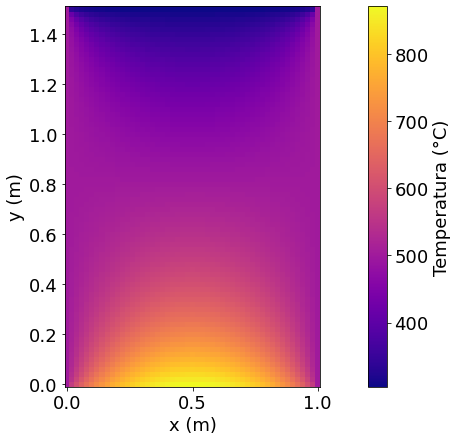

In [26]:
showplot()

Notar que para graficar usamos la traspuesta de la solción mediante el operador `.T`
```python
plt.pcolor(xx, yy, T.T)
```

Esto es debido a que el índice $i$, asociado al eje $x$, corresponde a las filas del arreglo `T`, mientras que el índice $j$ recorre las columnas de `T`.

Notar también que, en este problema, requerimos de un error relativo pequeño (0.001% en este caso) para asegurar convergencia. Si aumentamos la tolerancia, la solución se hace sensible al valor inicial en la iteración.

### Variables secundarias

En el problema anterior, la temperatura es la varible principal del problema. Sin embargo, es común que también que necesitemos información de **variables secundarias** basadas en la derivada o integral de la variable principal.

Por ejemplo, el **flujo de calor** está definido por: $\vec{q} = -k \nabla T = - k\left(\frac{\partial T}{\partial x}\hat{x} +\frac{\partial T}{\partial y}\hat{y}\right)$

En ```python``` usamos `gradient` para determinar la derivada en problemas de dos o más dimensiones

In [7]:
%%capture showplot1

skip = (slice(None, None, 5), slice(None, None, 5))
qy, qx = np.gradient(T.T,y,x) # gradiente 

plt.figure(figsize = (7, 7))
plt.rcParams.update({'font.size': 18})

plt.pcolor(xx, yy, T.T, cmap=cm.get_cmap(cm.plasma))
plt.colorbar(label="Temperatura (°C)", orientation="vertical")
plt.quiver(xx[skip],yy[skip],- qx[skip],- qy[skip]) # campo vectorial de q
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.axis('scaled')
plt.show()

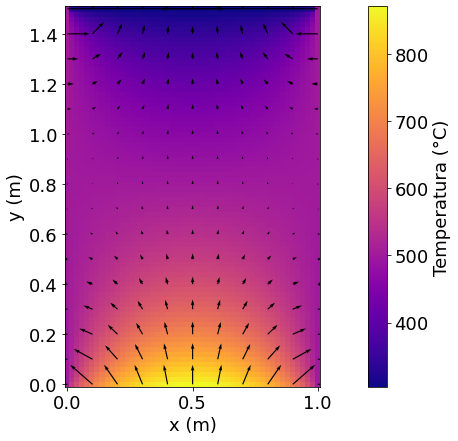

In [8]:
showplot1()

Notar el uso de la función `gradient` y `quiver` en este caso . 

En el caso de `gradient`, debemos alternar los ejes $x$ e $y$ en la forma:
```python
qy, qx = np.gradient(T.T,y,x) # gradiente
```

Para poder determinar el valor de $q$ debemos aplicar el negativo de `qx` y `qy`. Esto lo vemos en la función `quiver`:
```python
plt.quiver(xx,yy,- qx,- qy) # campo vectorial de q 

```

Por último, usamos `slice` para reducir el número de índices a graficar por `quiver`. En este contexto, la instrucción `skip = (slice(None, None, 5), slice(None, None, 5))`, es equivalente a:
```python
plt.quiver(xx[::5,::5],yy[::5,::5],- qx[::5,::5],- qy[::5,::5]) # campo vectorial de q 

```

Para EDP lineales estacionarias, como la ecuación de Laplace, el método de Gauss-Seidel es práctico y sencillo.


Para ecuaciones no lineales, el método puede ser aplicado mediante esquemas de linealización (similar a [Newton Raphson generalizado](https://panxopanza.github.io/metodos_numericos_mec301/6-Root-finding/6-Root-finding.html#metodos-de-busqueda-lineal)). Esto dada la dificultad de determinar una expresión explícita para $T_{i,j}$ con el sistema no-lineal.

Alternativamente, podemos utilizar EDP de tipo transciente y evaluar la evolución de la solución hasta alcanzar un comportamiento estacionario. Esto lo revisaremos a continuación.

## Ecuaciones parabólicas (EDP transciente)

Una de las ecuaciones parabólicas más comunes es la ley de conducción de calor 1D transciente:

\begin{equation*}
\frac{\partial T}{\partial t} = k\frac{\partial^2 T}{\partial x^2}
\end{equation*}

Esta ecuación requiere de dos condiciones de borde para $x$ y una condición inicial para $t$.

También podemos usar el método de diferencias finitas para resolver este problema. Sin embargo, en este caso tenemos un problema de condiciones de borde mezclada con un problema de valor inicial.

Como revisamos en la [unidad 9](https://panxopanza.github.io/metodos_numericos_mec301/9-EDO_valor_inicial/9-EDO_valor_inicial.html), existen diversos métodos para resolver problemas de valor inicial. En esta unidad nos enfocaremos en el **método de Euler explícito**.

### EDP lineal 1D transciente

Nuevamente, revisemos una barra que se enfría por convección. Ahora, la barra se encuentra inicialmente a temperatura ambiente $T_\infty$



<img src="./images/heated_bar.png" width="400px" align= center>

\begin{equation*}
\frac{\partial T}{\partial t} = k\frac{\partial^2 T}{\partial x^2} + h'(T_\infty - T)
\end{equation*}

\begin{equation*}
T(0,x) = T_\infty
\end{equation*}

\begin{equation*}
T(t,0) = T_a;\quad\quad\quad \frac{\partial T}{\partial x}\Big|_{x=L} = h^* \left[T_\infty - T(t,L)\right]
\end{equation*}

Usando diferencias finitas con el método de Euler explícito:

\begin{align*}
\frac{T_{i}^{l+1} - T_{i}^l}{\Delta t} = k\frac{T_{i+1}^l - 2T_{i}^l + T_{i-1}^l}{\Delta x^2} + h'(T_\infty - T_i^l) \quad\quad &\mathrm{if}~i \neq 0, m\\[10pt]
T_{i}^{l+1}= T_a\quad\quad &\mathrm{if}~i = 0 \\[10pt]
\frac{T_{i}^{l+1} -  T_{i-1}^{l+1}}{\Delta x}  = h'(T_\infty - T_i^{l+1})\quad\quad &\mathrm{if}~i = m\\[10pt]
\end{align*}

El sistema a resolver esta dado por:

\begin{align*}
T_{i}^{l+1} = (1 - \Delta t h') T_{i}^l + \frac{k\Delta t}{\Delta x^2}\left(T_{i+1}^l - 2T_{i}^l + T_{i-1}^l\right) + \Delta t h'T_\infty\quad\quad &\mathrm{if}~i \neq 0, m\\[10pt]
T_{i}^{l+1} = T_a\quad\quad &\mathrm{if}~i = 0 \\[10pt]
T_{i}^{l+1} =\frac{1}{1 + \Delta x h'} \left(T_{i-1}^{l+1}  + \Delta x~h'T_\infty\right)\quad\quad &\mathrm{if}~i = m\\[10pt]
\end{align*}

Notar que las condiciones de borde están definidas respecto al valor futuro. Esto es simplemente por convenciencia en el método explícito

Resolvemos la equación para los siguientes parámetros:

\begin{align*}
T_a &= 400~\mathrm{K} \\
T_\infty &= 300~\mathrm{K} \\
h' &= 0.002~\mathrm{s}^{-1} \\
k &= 0.0001~\mathrm{m}^2/\mathrm{s} \\
L &= 1 ~\mathrm{m} \\
\end{align*}

In [9]:
# definimos las constantes del problema
Ta   = 400    # Temperatura al lado izquierdo (K)
Too  = 300    # Temperatura del aire (K)b
h    = 0.002  # Coeficiente convectivo (m^-1)
k    = 0.0001 # flujo de calor (m^2/s)
L    = 1      # Largo de la barra (m)

Para asegurar convergencia y estabilidad en nuestra solución, se debe cumplir la condición:

\begin{equation}
\Delta t \le \frac{1}{2} \frac{\Delta x^2}{k}
\end{equation}

In [10]:
Nx = 20                    # número total de nodos
n = Nx - 1                 # índice del nodo extremo
dx = L/(Nx - 1)            # espaciamiento entre nodos
dt = 0.5*1/2*dx**2/k       # paso de tiempo
t = np.arange(0,100*dt,dt) # Intervalo de tiempo

T0 = Too*np.ones(Nx)       # condición inicial
T_time = [T0]              # arreglo para almacenar soluciones

T = T0.copy()             
for l in range(len(t)) :
    Tl = T.copy()
    for i in range(Nx):
        if   i == 0: T[i] = Ta
        elif i == n: T[i] = 1/(1+dx*h)*(T[i-1] + dx*h*Too)
        else:
            T[i] = (1 - dt*h)*Tl[i] + k*dt/dx**2*(Tl[i+1] - 2*Tl[i] + Tl[i-1]) + dt*h*Too
    T_time.append(T.copy())

Ahora graficamos nuestro resultado

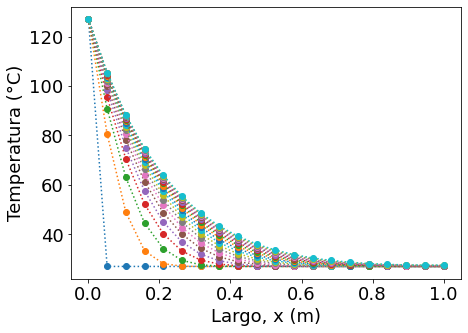

In [11]:
x = np.linspace(0,L,Nx)              # arreglo de puntos en x
plt.figure(figsize = (7, 5))
plt.rcParams.update({'font.size': 18})
for it in range(1,len(t),5):         # iteramos sobre nuestras soluciones   
    plt.plot(x,T_time[it] - 273,'o:') 
plt.xlabel('Largo, x (m)')
plt.ylabel('Temperatura (°C)')
plt.show()

### EDP no-lineal 1D transciente

Una ventaja del método de Euler explícito es que nos permite fácilmente extender el resultado a EDP del tipo no lineal. Esto debido a que los valores de $T_{i}^{l+1}$ siempre quedan expresados en función de valores conocidos.

Analicemos esto con el problema de la barra ahora con enfriamiento por convección y radiación

<img src="./images/heated_bar_radiation.png" width="400px" align= center>

\begin{equation*}
\frac{\partial T}{\partial t} = k\frac{\partial^2 T}{\partial x^2} + h'(T_\infty - T) + \sigma'(T_\infty^4 - T^4)
\end{equation*}

\begin{equation*}
T(0,x) = T_\infty
\end{equation*}

\begin{equation*}
T(t,0) = T_a;\quad\quad\quad \frac{\partial T}{\partial x}\Big|_{x=L} = h^* \left[T_\infty - T(t,L)\right]
\end{equation*}

Al aplicar diferencias finitas, notamos que el problema, nuevamente, queda definido de forma explícita en función de valores conocidos:

\begin{align*}
T_{i}^{l+1} = (1 - \Delta t h') T_{i}^l - \Delta t\sigma'\left(T_{i}^4\right)^l + \frac{k\Delta t}{\Delta x^2}\left(T_{i+1}^l - 2T_{i}^l + T_{i-1}^l\right) + \Delta t h'T_\infty + \Delta t\sigma' T_\infty^4\quad\quad &\mathrm{if}~i \neq 0, m\\[10pt]
T_{i}^{l+1} = T_a\quad\quad &\mathrm{if}~i = 0 \\[10pt]
T_{i}^{l+1} =\frac{1}{1 + \Delta x h'} \left(T_{i-1}^{l+1}  + \Delta x~h'T_\infty\right)\quad\quad &\mathrm{if}~i = m\\[10pt]
\end{align*}

Analicemos la solución de este problema para los siguientes parámetros:


\begin{align*}
T_a &= 400~\mathrm{K} \\
T_\infty &= 300~\mathrm{K} \\
h' &= 0.002~\mathrm{s}^{-1} \\
\sigma' &= 1\times 10^{-10}~\mathrm{s}^{-1}\mathrm{K}^{-3} \\
k &= 0.0001~\mathrm{m}^2/\mathrm{s} \\
L &= 1 ~\mathrm{m} \\
\end{align*}

In [12]:
# definimos las constantes del problema
Ta   = 400    # Temperatura al lado izquierdo (K)
Too  = 300    # Temperatura del aire (K)b
h    = 0.002  # Coeficiente convectivo (m^-1)
S    = 1E-10  # Coeficiente convectivo (m^-1)
k    = 0.0001 # flujo de calor (m^2/s)
L    = 1      # Largo de la barra (m)

In [13]:
Nx = 20                    # número total de nodos
n = Nx - 1                 # índice del nodo extremo
dx = L/(Nx - 1)            # espaciamiento entre nodos
dt = 0.5*1/2*dx**2/k       # paso de tiempo
t = np.arange(0,100*dt,dt) # Intervalo de tiempo

T0 = Too*np.ones(Nx)       # condición inicial
T_time = [T0]              # arreglo para almacenar soluciones

T = T0.copy()             
for l in range(len(t)) :
    Tl = T.copy()
    for i in range(Nx):
        if   i == 0: T[i] = Ta
        elif i == n: T[i] = 1/(1+dx*h)*(T[i-1] + dx*h*Too)
        else:
            T[i] = (1 - dt*h)*Tl[i] - dt*S*Tl[i]**4 + k*dt/dx**2*(Tl[i+1] - 2*Tl[i] + Tl[i-1]) + dt*h*Too + dt*S*Too**4
    T_time.append(T.copy())

Graficamos nuestro resultado

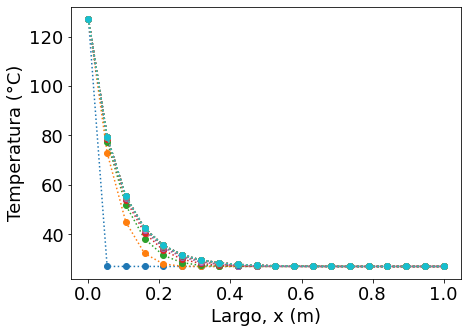

In [14]:
x = np.linspace(0,L,Nx)              # arreglo de puntos en x

plt.figure(figsize = (7, 5))
plt.rcParams.update({'font.size': 18})

for it in range(1,len(t),5):         # iteramos sobre nuestras soluciones   
    plt.plot(x,T_time[it] - 273,'o:') 
plt.xlabel('Largo, x (m)')
plt.ylabel('Temperatura (°C)')
plt.show()

## EDP transcientes en 2D

El método explícito puede ser fácilmente extendido a problemas con más dimenciones, EDP no lineales, o incluso, con más de una varible dependiente (sistemas de EDPs).

Revisemos una EDP 2D, considerando el problema de la placa analizado anteriormente.

<img src="./images/plate_boundary_conditions.png" width="400px" align= center>

Ahora como un problema transciente:

\begin{equation*}
\frac{\partial T}{\partial t}= k\frac{\partial^2 T}{\partial x^2} +
k\frac{\partial^2 T}{\partial y^2}
\end{equation*}

con condición inicial $T(0,x,y) = T_\infty$

Usando diferencias finitas, con Euler explícito, derivamos un sistema de la forma:

\begin{align*}
T_{i,j}^{l+1} = T_{i,j}^{l} + \frac{k\Delta t}{\Delta x^2}\left(T_{i+1,j}^l - 2T_{i,j}^l + T_{i-1,j}^l\right)
+ \frac{k\Delta t}{\Delta y^2}\left(T_{i,j+1}^l - 2T_{i,j}^l + T_{i,j-1}^l\right)\quad\quad &\mathrm{if}~i \neq 0, m~\mathrm{and}~j\neq0,n \\[10pt]
T_{i,j}^{l+1} = T_a\quad\quad &\mathrm{if}~i = 0 \\[10pt]
T_{i,j}^{l+1} = T_b\quad\quad &\mathrm{if}~i = m \\[10pt]
T_{i,j+1}^{l+1} - T_{i,j}^{l+1}  = -\Delta y q_0\quad\quad &\mathrm{if}~j =0\\[10pt]
(1 + h\Delta y)T_{i,j}^{l+1} -  T_{i,j-1}^{l+1}  = \Delta y~hT_\infty\quad\quad &\mathrm{if}~j = n\\[10pt]
\end{align*}

Nuevamente, usamos valores futuros para las condiciones de borde

En este caso, la condición de estabilidad y convergencia está dada por:

\begin{equation}
\Delta t \le \frac{1}{8} \frac{\Delta x^2 + \Delta y^2}{k}
\end{equation}

Resolvamos este problema en un código, considerando los parámetros

\begin{eqnarray*}
T_a &=& 500~\mathrm{K};\quad\quad 
h &=& 100~\mathrm{m}^{-1} \\
T_b &=& 500~\mathrm{K};\quad\quad 
k &=& 0.0001~\mathrm{m}^2/\mathrm{s} \\
T_\infty &=& 300~\mathrm{K};\quad\quad
q_0 &=& 1000 ~\mathrm{K/m} \\
L &=& 1 ~\mathrm{m};\quad\quad\quad
H &=& 1.5 ~\mathrm{m} \\
\end{eqnarray*}

In [15]:
# definimos las constantes del problema
Ta   = 500    # Temperatura al lado izquierdo (K)
Tb   = 500    # Temperatura al lado derecho (K)
Too  = 300    # Temperatura del aire (K)b
h    = 100    # Coeficiente convectivo (m^-1)
k    = 0.0001 # conductividad térmica (m^2/s)
q0   = 1000   # flujo de calor (K/m))
L, H = 1, 1.5 # Largo y ancho de la cavidad (m)

En este caso, definiremos una función `T_plate_time` que determinará la distribución de temperaturas para un tiempo `tend`

In [16]:
def T_plate_time(Nx,Ny, tend):
    # Definimos las características de la malla
    nx, ny = Nx - 1, Ny - 1         # índice último nodo
    dx, dy = L/(Nx - 1), H/(Ny - 1) # espaciamiento entre nodos
    dt = 0.5*1/8*(dx**2 + dy**2)/k  # paso de tiempo
    t = np.arange(0,tend,dt)        # Intervalo de tiempo

    # Iteramos
    T0 = Too*np.ones((Nx,Ny))       # condición inicial
    T = T0.copy()
    for l in range(len(t)):
        Tl = T.copy()       # guardamos la iteración previa
        
        for i, j in product(range(Nx),range(Ny)):  # loop sobre i y j
                
                # condiciones de borde
                if   i == 0:  T[i,j] = Ta
                elif i == nx: T[i,j] = Tb
                elif j == 0:  T[i,j] = T[i,j+1] + dy*q0
                elif j == ny: T[i,j] = 1/(1 + dy*h)*(T[i,j-1] + dy*h*Too)
            
                # nodos centrales
                else: T[i,j] = Tl[i,j] + k*dt/dx**2*(Tl[i+1,j] - 2*Tl[i,j] + Tl[i-1,j]) \
                                       + k*dt/dy**2*(Tl[i,j+1] - 2*Tl[i,j] + Tl[i,j-1])
                
                     
    return T

In [17]:
%%capture showplot2

# Definimos las características de la malla
Nx, Ny = 51, 76                    # total de nodos
T = T_plate_time(Nx,Ny, tend = 200) # Determinamos T(x,y)

x =   np.linspace(0,L,Nx) # coordenadas x
y =   np.linspace(0,H,Ny) # coordenadas y
xx, yy = np.meshgrid(x,y) # malla x-y

skip = (slice(None, None, 5), slice(None, None, 5))
qy, qx = np.gradient(T.T,y,x) # gradiente 

plt.figure(figsize = (7, 7))
plt.rcParams.update({'font.size': 18})

plt.pcolor(xx, yy, T.T, cmap=cm.get_cmap(cm.plasma))
plt.colorbar(label="Temperatura (°C)", orientation="vertical")

# campo vectorial de q
plt.quiver(xx[skip],yy[skip],- qx[skip],- qy[skip]) 
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.axis('scaled')
plt.show()

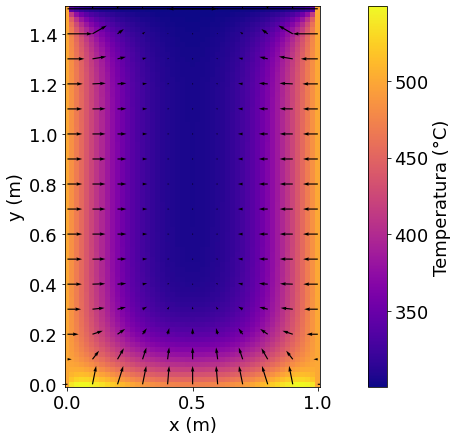

In [18]:
showplot2()

## Referencias
- Chapra S., Canale R. **Capítulo 28: Diferencias finitas: ecuaciones elípticas** en *Métodos Numéricos para Ingenieros*, 6ta Ed., McGraw Hill, 2011

- Chapra S., Canale R. **Capítulo 29: Diferencias finitas: ecuaciones parabólicas** en *Métodos Numéricos para Ingenieros*, 6ta Ed., McGraw Hill, 2011


- Williams H. P. **Chapter 20: Partial diferential equations** in "Numerical Recipes" 3rd Ed, Cambridge University Press, 2007
